# Galactic Dynamics

## Potential Theory


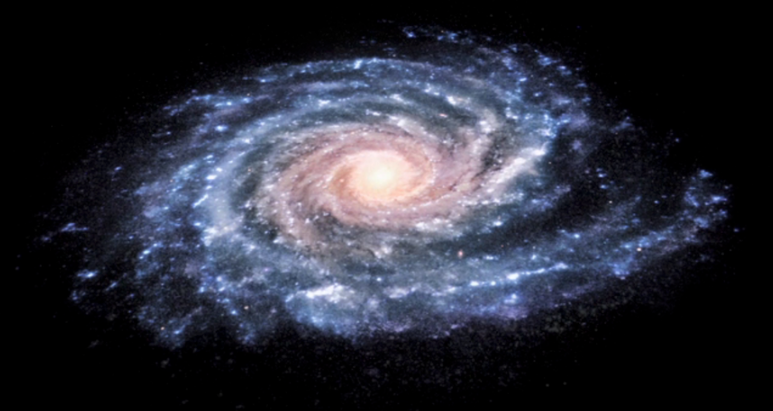


One of the main differences between Galactic dynamics and Planetary dynamics is that in the latter the motion is dominated by a central mass. Whereas in the Solar System 99% of the mass resides in the Sun, in a galaxy the situation is reversed. The central supermassive black hole of the Milky Way counts about a few 10$^6$ solar masses, whereas the galaxy itself has over 10$^{12}$ solar masses. Clearly, in a galaxy, it is not the central mass that dominates. The stuff in the galaxy (stars, gas and dark matter) generate a potential, and stuff moves individually under the influence of this common potential. Instead of adding up the gravity of every single one of the 10$^{11}$ stars in a galaxy, we will smooth their mass density on a scale that is small compared to the size of the galaxy, but big compared to the mean distance between stars. The potential is computed with this averaged mass density, and individual stars will be treated as test particle moving in this potential. 

### Gravitational Potential

What is the force $\mathbf{F}(\mathbf{x})$ on a mass $m_s$ at position $\mathbf{x}$ caused by the gravitational attraction of a distribution of mass with density $\rho(x^\prime) $

Sum all the small contributions

\begin{eqnarray}
d F(\mathbf{x}) &=& G m_s \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} d m(\mathbf{x}^\prime)\\
&=& G m_s \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} \rho(\mathbf{x}^\prime) d^3\mathbf{x}^\prime
\end{eqnarray}

And integrate to find the full force, $F (\mathbf{x})= \int dF(\mathbf{x}) = m_s \mathbf{g}(x) $

Defining the acceleration

\begin{equation}
\mathrm{g}(\mathbf{x}) \equiv  G \int \rho(\mathbf{x}^\prime) \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3}  d^3\mathbf{x}^\prime
\end{equation}

If we define the gravitational potential $\Phi(\mathrm{x})$

\begin{equation}
\Phi(\mathbf{x}) \equiv - G \int \frac{\rho(\mathbf{x}^\prime)}{|\mathbf{x}^\prime-\mathbf{x}|}  d^3\mathbf{x}^\prime
\end{equation}

Then we have that 

\begin{equation}
\mathbf{\nabla} \left( \frac{1}{|\mathbf{x}^\prime-\mathbf{x}|} \right) = \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} 
\end{equation}

and the gravitational acceleration can be written as 

\begin{equation}
\mathbf{g} = -\nabla \Phi
\end{equation}


In many situations, it is easier to find $\Phi$ and then take the gradient to find the acceleration. Plus, $\Phi$ is a scalar. 

### Poisson Equation


If we take the divergence of the acceleration

\begin{equation}
\nabla \cdot \mathbf{g}(\mathbf{x}) \equiv  G \int \rho(\mathbf{x}^\prime)  \nabla \cdot \left( \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} \right) d^3\mathbf{x}^\prime
\end{equation}

We need to compute the divergence of the quantity in parentheses. Let us use SymPy for that

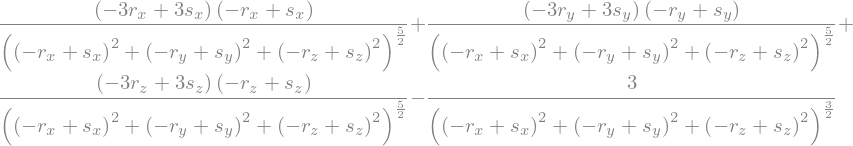

In [10]:
import sympy 
from sympy.physics.vector import ReferenceFrame, divergence
from sympy import init_printing, init_session

init_session(quiet=True)
init_printing() 

r  = ReferenceFrame('r')
s  = ReferenceFrame('s')

xc = r[0]*r.x + r[1]*r.y + r[2]*r.z
xp = s[0]*r.x + s[1]*r.y + s[2]*r.z

mod = sqrt((xp-xc) & (xp-xc))

divfunc = divergence((xp-xc)/mod**3,r)

divfunc



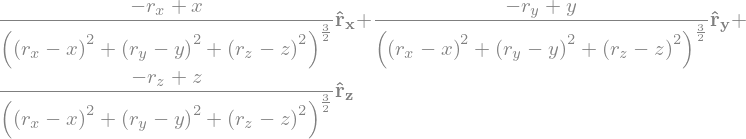

In [19]:
import sympy 
from sympy import init_printing,init_session
from sympy.physics.vector import ReferenceFrame,gradient
from sympy import Symbol

init_session(quiet=True)
init_printing

r = ReferenceFrame('r')

xc  = r[0]*r.x + r[1]*r.y + r[2]*r.z

x=Symbol('x')
y=Symbol('y')
z=Symbol('z')

xp  = x*r.x + y*r.y + z*r.z

mod = sqrt((xc-xp) & (xc-xp))

gradient(1/mod,r)




So, we have that 

\begin{equation}
\nabla \cdot \left( \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} \right) = \frac{3(\mathbf{x}^\prime-\mathbf{x})(\mathbf{x}^\prime-\mathbf{x})}{|\mathbf{x}^\prime-\mathbf{x}|^5} - \frac{3}{|\mathbf{x}^\prime-\mathbf{x}|^3}
\end{equation}

When $\mathbf{x}^\prime\neq \mathbf{x}$, the denominators are nonzero, and the expression cancels. Indeed, simplifying the expression we obtained in sympy

In [2]:
simplify(divfunc)

This means that any contribution to $\nabla\cdot \mathbf{g}$ must come from the point $\mathbf{x}=\mathbf{x}^\prime$. We can integrate then in a small region of radius $h$ around this point, and make $h$ as small as we want. When $h$ is sufficiently small, the density is constant in the sphere of radius $h$, and we can remove it from the integral  

\begin{equation}
\nabla \cdot \mathbf{g}\ (\mathbf{x}) =  G \rho(\mathbf{x}^\prime)\int_{|\mathbf{x}^\prime-\mathbf{x}|\leq h}   \nabla \cdot \left( \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} \right) d^3\mathbf{x}^\prime
\end{equation}

We can now change the gradient from $x$ to $x^\prime$

\begin{equation}
\nabla \cdot \mathbf{g}\ (\mathbf{x}) =  - G \rho(\mathbf{x}^\prime)\int_{|\mathbf{x}^\prime-\mathbf{x}|\leq h}   \nabla_{x^\prime} \cdot \left( \frac{\mathbf{x}^\prime - \mathbf{x}}{|\mathbf{x}^\prime-\mathbf{x}|^3} \right) d^3\mathbf{x}^\prime
\end{equation}

Apply Gauss theorem to remove the divergence, rendering it an area integral on the surface of radius $h$

\begin{equation}
\nabla \cdot \mathbf{g}\ (\mathbf{x}) =  -G \rho(\mathbf{x}^\prime)\int_{|\mathbf{x}^\prime-\mathbf{x}|= h} \frac{(\mathbf{x}^\prime - \mathbf{x})}{h^3} d^2\mathbf{S}^\prime
\end{equation}

The area element $A=\int d^2\mathrm{S}^\prime$ on the surface of a sphere of radius $R$ is related to the solid angle $\Omega$. 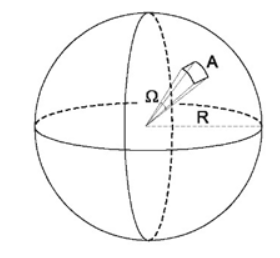

Thus, $|d^2\mathrm{S}^\prime| = h^2 d\Omega$. To keep it vectorial, $h = |\mathbf{x}^\prime-\mathbf{x}|$, and thus  $d^2\mathrm{S}^\prime = (\mathbf{x}^\prime-\mathbf{x})h d\Omega$

The integral then becomes 

\begin{equation}
\nabla \cdot \mathbf{g}\ (\mathbf{x}) =  -G \rho(\mathbf{x}^\prime)\int \frac{1}{h^2}(\mathbf{x}^\prime - \mathbf{x})\cdot (\mathbf{x}^\prime-\mathbf{x}) d\Omega
\end{equation}

And because $(\mathbf{x}^\prime - \mathbf{x})\cdot (\mathbf{x}^\prime-\mathbf{x}) = h^2$

\begin{eqnarray}
\nabla \cdot \mathbf{g}\ (\mathbf{x}) &=&  -G \rho(\mathbf{x}^\prime)\int d\Omega\\
&=&-4\pi G \rho
\end{eqnarray}

Substituting now $\mathbf{g} = -\nabla\Phi$, we obtain $\bf{Poisson's \ equation}$ relating the potential and the density

\begin{equation}
\boxed{\boxed{\nabla^2\Phi=  4\pi G \rho}}
\end{equation}

### Spherically symmetric potentials

Isaac Newton proved two theorems for spherically symmetric systems, that great simplify obtaining their potential.

##### Newton's first theorem

A body that is inside a spherical shell of matter experiences no net gravitational force from that shell. 


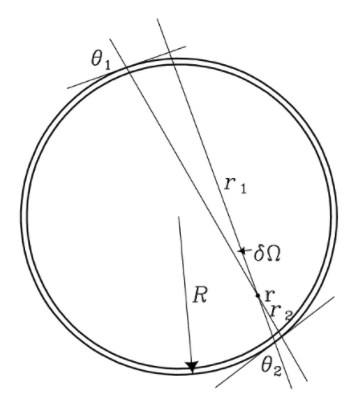


This is geometrically seen from the figure above. Considering the cone of the solid angle $\delta \Omega$ and centered at $r$. The cone intersects the shell at two locations, of angular extent $\theta_1$ and $\theta_2$. 


##### Newton's second theorem

The gravitational force on a body that lies outside a spherical shell of matter is the same as it would be if all the shell's matter were concentrated into a point at its center. 

Poisson's equation $\nabla^2\Phi=  4\pi G \rho$ in case of a spherical system takes a simpler form. 

\begin{equation}
\frac{1}{r^2}\frac{\partial}{\partial r} \left( r^2 \frac{\partial \Phi}{\partial r} \right) = 4\pi G \rho(r)
\end{equation}